# ENPH 213 - Week 10 Lab

In this lab, we will be working on numerically solving partial differential equations and continuing to develop your Python skills.

When you are finished, please rename this notebook to LastName_ENPH213_Lab10, where LastName is your last name.  Submit that file to onQ.

For marking Parts 1-3 will be marked together (Weighted out of 10).

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# Part 1

Write a function that solves Laplace's equation $\nabla^2 V = 0$ and plots the electric potential of a parallel  plate capacitor placed inside a conducting box as shown in the diagram below.  The top plate of the capacitor is held at +10 Volts while the bottom plate is held at ‐10 Volts.  The box is grounded (0 Volts). Use a grid with 1 mm spacing in both directions give a total array size of 41x41 points. You will need to use the relaxation method to solve for the potential $V$ and will have to determine the number of iterations that are required for your solution to converge.

Once solved, plot a filled contour plot of the potential in the region as well as the number of iterations required to converge.

Hint: When needed, solve the "ODE" equations with the plates as boundary conditions.

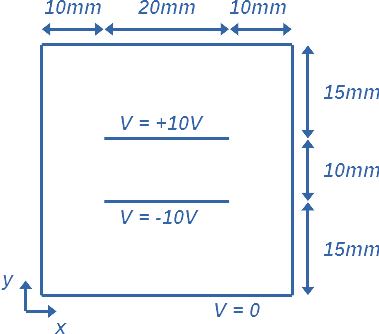

110


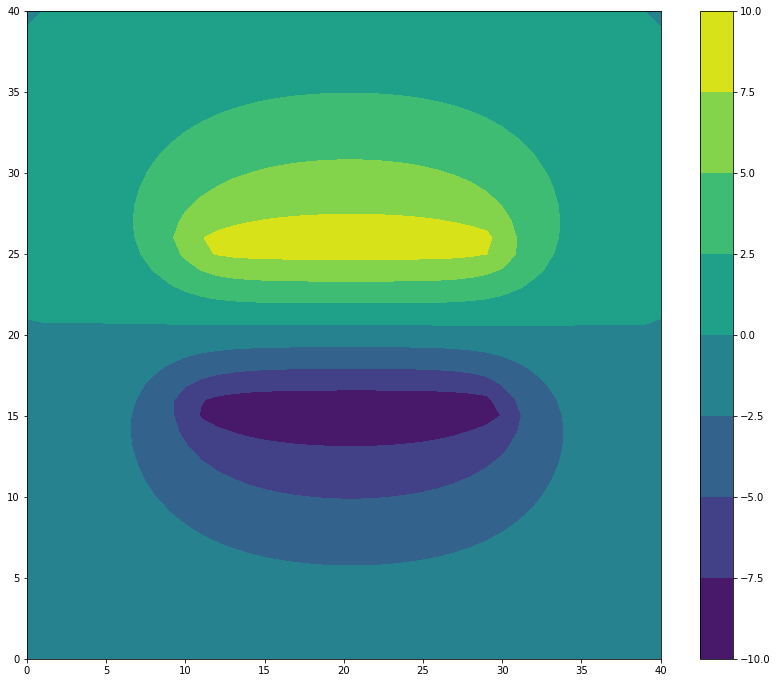

In [54]:
x = np.linspace(0,40,41)
y = np.linspace(0,40,41)

V = np.zeros([x.size,y.size])

Con1 = 0.001 #this is a randomly chosen convergence initial guess

for loops in range(0,100000): #number here doesnt matter as long as its a large number 
    V[26,11:31] = 10 #setting the top plate to 10 volts every time through the loop
    V[16,11:31] = -10 #setting bottom plate to -10 volts

    for i in range(1,x.size-1): # not including the endpoints because they are 0
        for j in range(1, y.size-1):
            V[i,j] = (V[i+1,j] + V[i-1,j] + V[i,j+1] + V[i,j-1])/4 #method from class
            
    if loops > 100:
        Con2 = V[5,20] #fairly equally spaced between 3 fixed values
        if(abs(Con2-Con1) < 0.01): #once convergence is achieved the whole loop breaks
            print(loops) #this is the number of iterations to converge
            break
        Con1 = Con2
            
    
    
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
contr = plt.contourf(x, y, V)
fig.colorbar(contr)
plt.rcParams['figure.figsize']= [11,9] #making all the plots more legible
plt.show()

# Part 2

Plot the electric field of the configuration.  To do this, you can either use your function developed in Week 3 or you may also use Numpy's gradient() function.

Plot the electric field using a quiver plot as you did in Week 3.

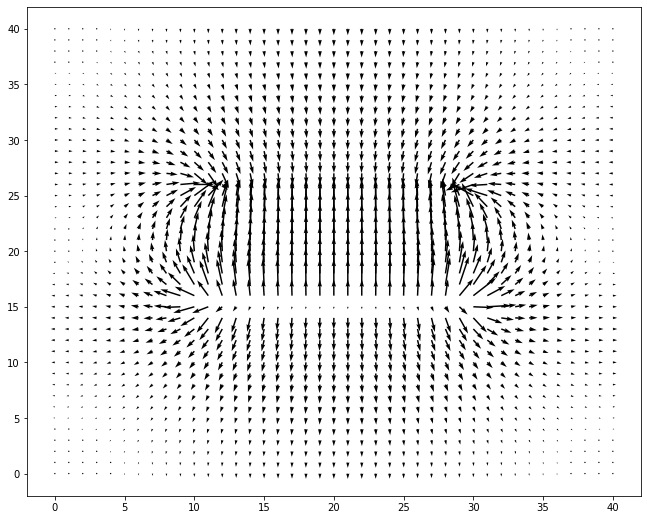

In [55]:
Ex = np.zeros([x.size,y.size])
Ey = np.zeros([x.size,y.size]) #same as part one but with two arrays now 

for i in range(x.size - 1):
    Ex[i,:] = np.gradient(V[i,:]) #taking the gradient of V
    
for i in range(y.size-1):
    Ey[:,i] = np.gradient(V[:,i]) #doing the same thing again for Ey
    
fig, ax = plt.subplots()
q = ax.quiver(x, y, Ex, Ey)

# Part 3

Here, you will plot the effect of shaking the end of a rope using the wave equation.

$\Large \frac{\partial^2 u}{\partial x^2} = c^2 \frac{\partial^2 u}{\partial t^2} $

where $c$ is the speed of the wave, which we will set to 1.

For the initial conditions, set all $u$ displacement values equal to zero.  As the spatial boundary condition, set $u_(x_0) = u_(x_1) = \sin(t_j)$.

As with the heat conduction example, you will solve for $t_{j+1}$ from your equation.  However, because the time derivative is second order, you need to start on the third time step. 

Create an array $dispAll$ that can hold all calculated displacement values ($u$) for all positions and timesteps. 

Use a step of $h_t = 0.01$ in time and $h_x = 0.05$ in $x$, and use a range of time from 0 to 20, and a range of $x$ from 0 to 20.  Plot evey 100th graph to watch the wave move across the domain.

Repeat the above, but use a range of time from 0 to 40.  
**Question:  Does it look different?  If so, what is happening?**

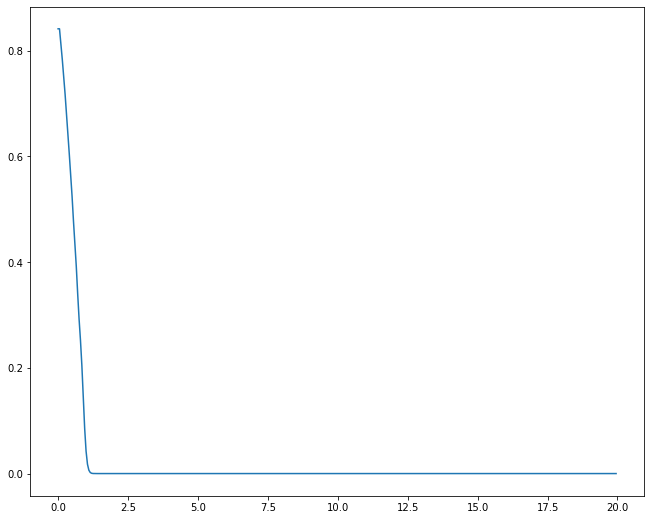

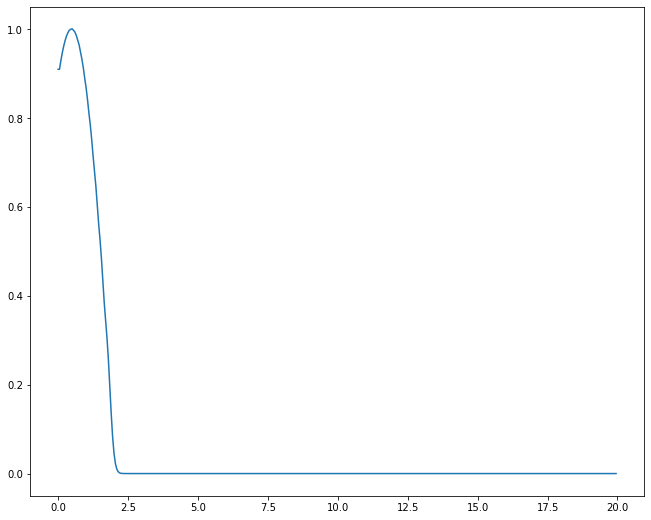

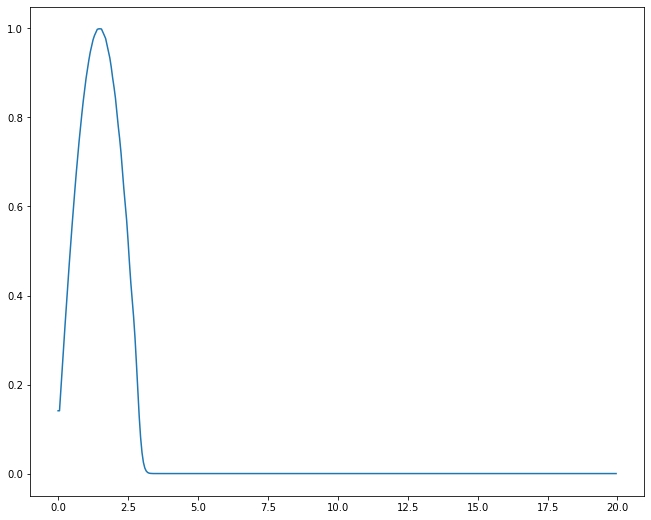

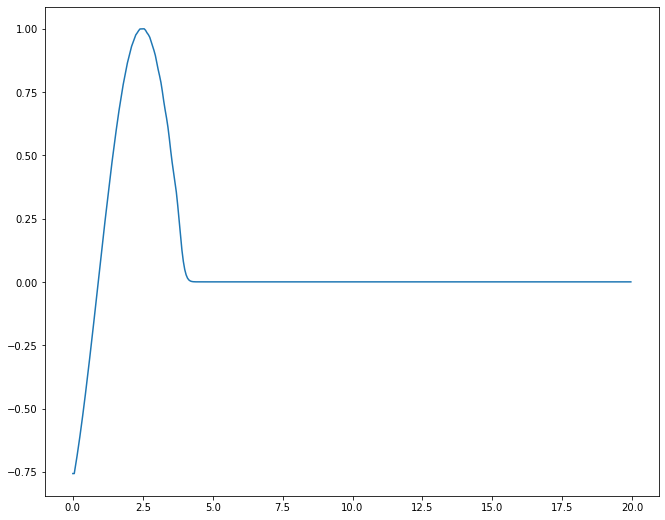

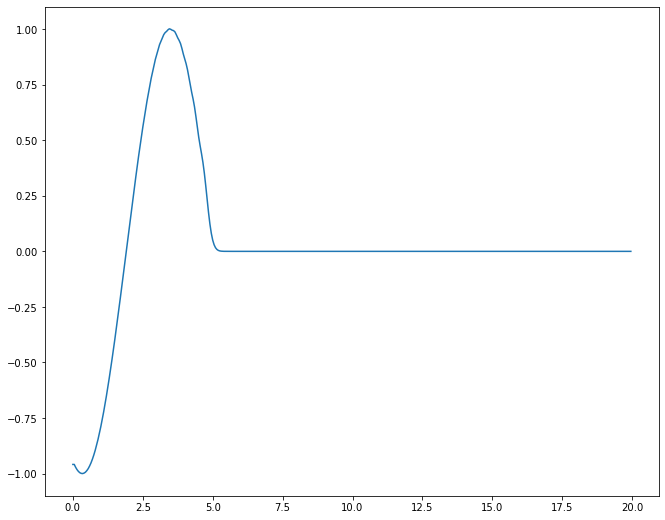

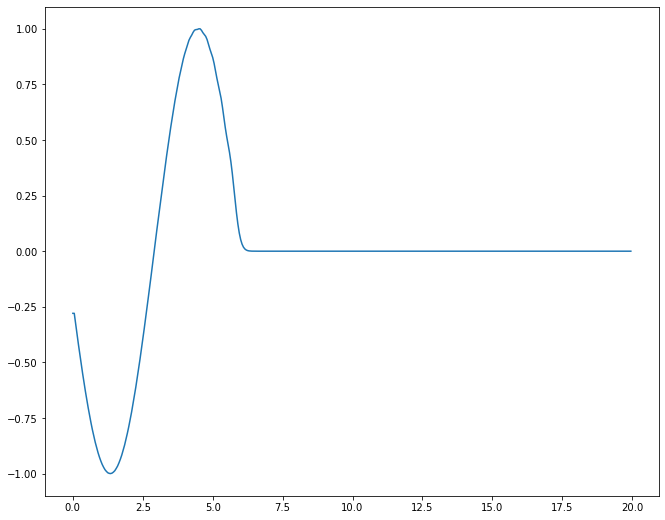

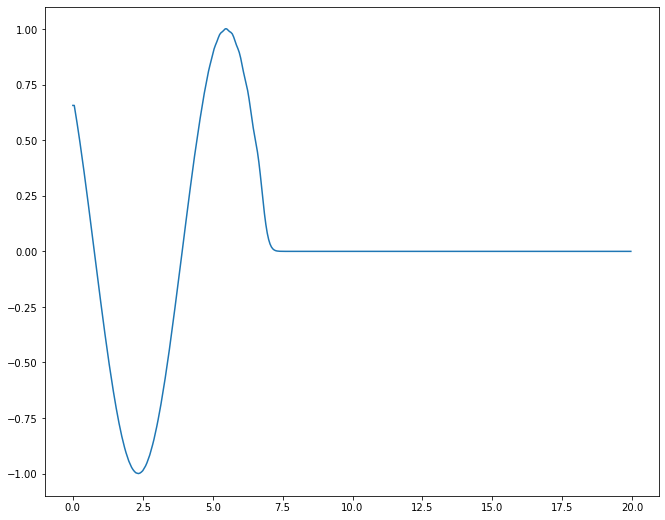

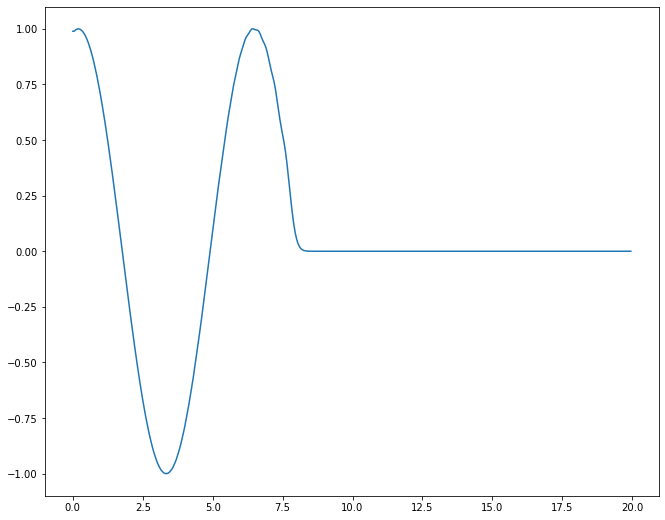

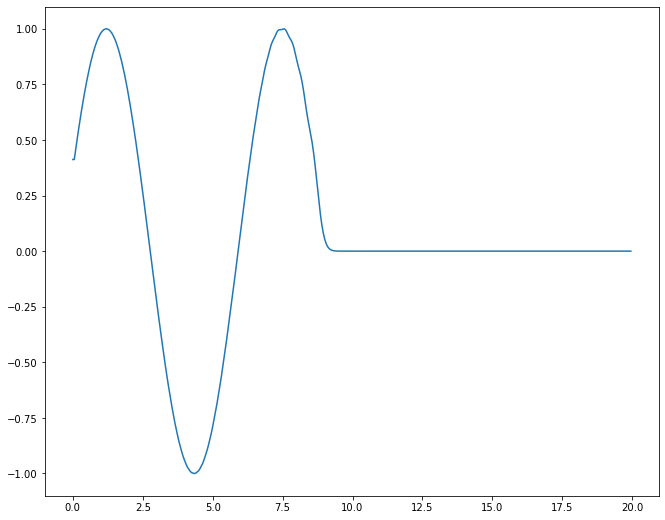

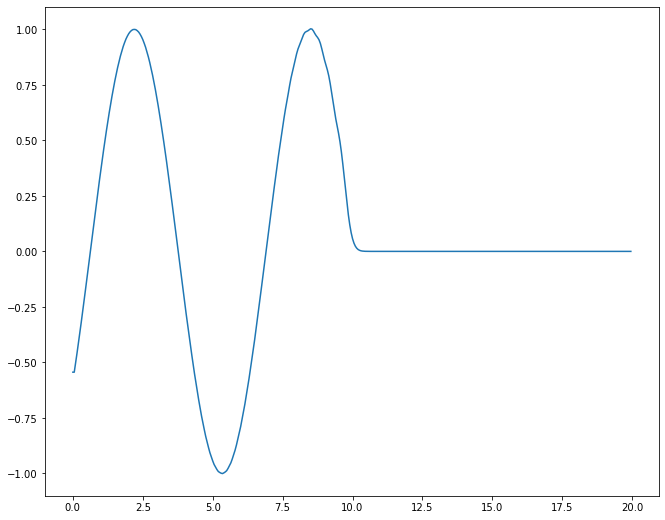

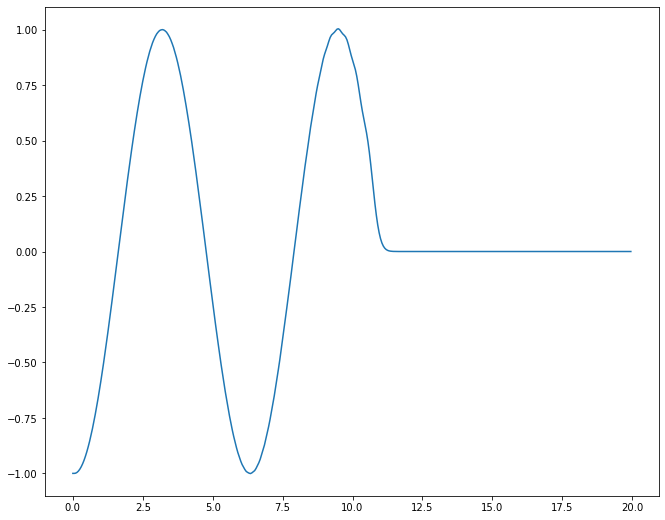

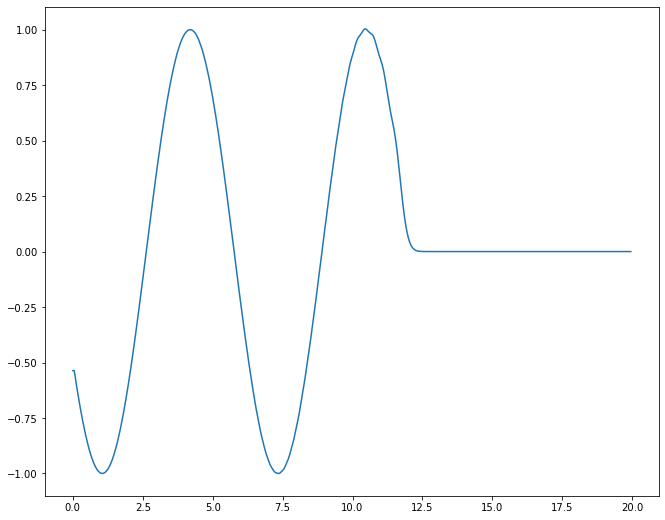

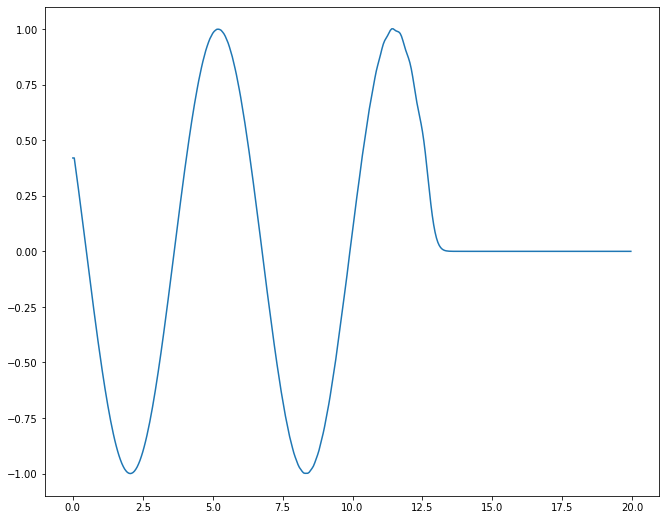

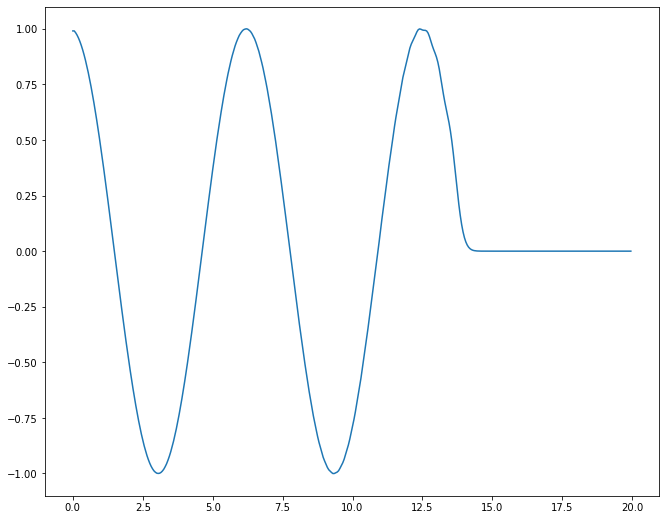

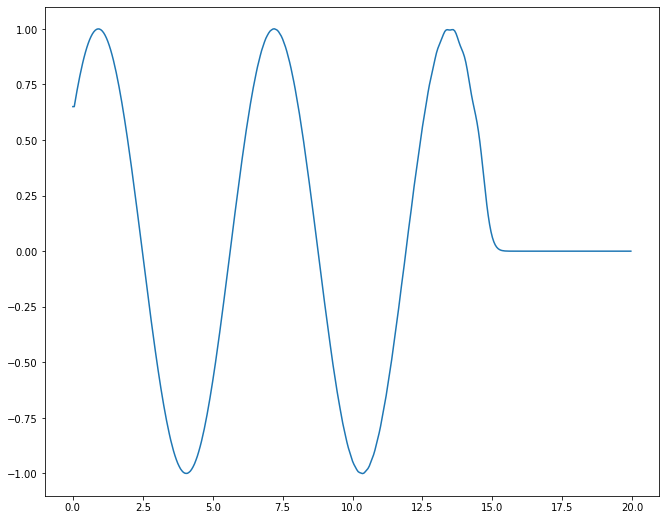

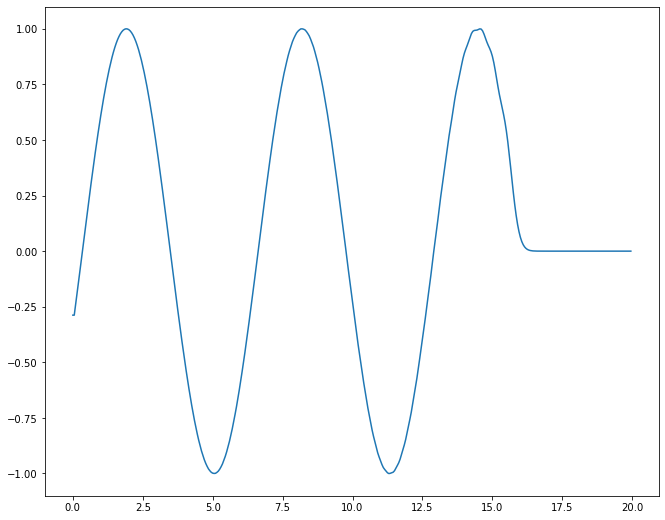

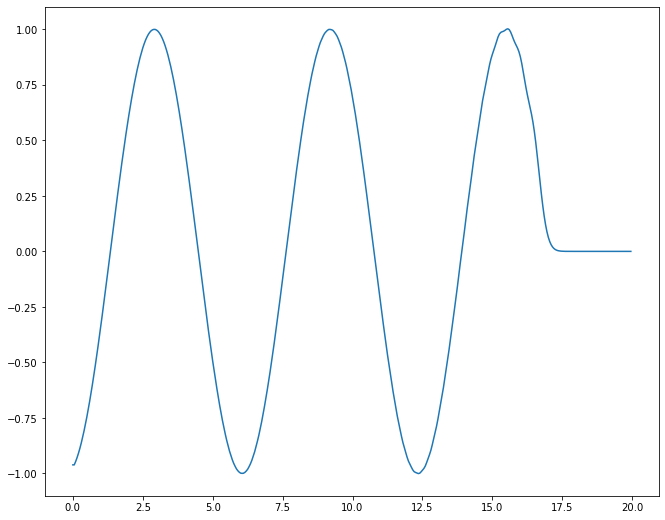

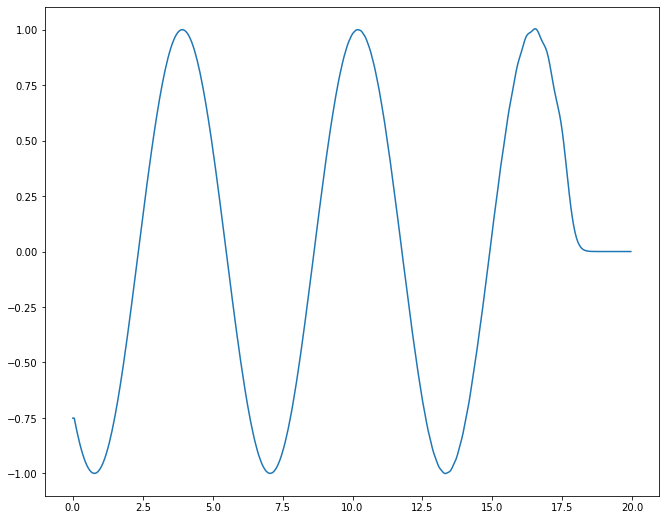

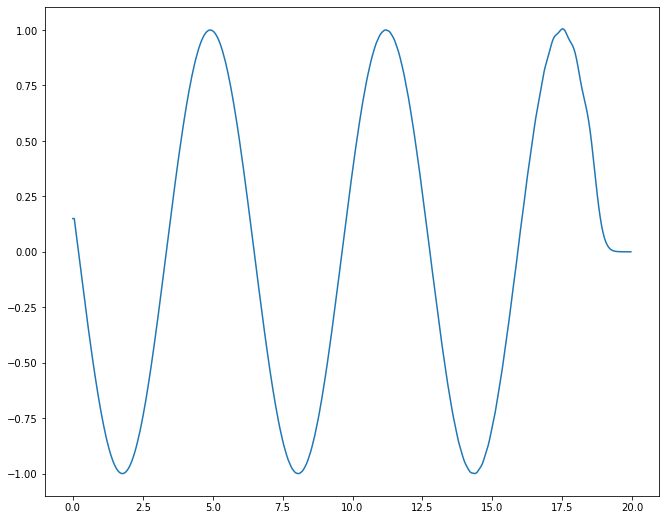

In [78]:
h_t = 0.01
h_x = 0.05 #initialize these values for efficiency because theyre used multiple times
x = np.arange(0, 20, h_x) #initialize x array with steps of h_x
t = np.arange(0, 20, h_t) #same idea
    
dispAll = np.zeros([t.size,x.size]) #creating the array to hold the u values

for i in range(1,t.size-1):
    dispAll[i, 0:2] = np.sin(t[i]) #setting boundary each time
    for j in range(2, x.size-1): #starting from 2 because the first 2 conditions are set
        dispAll[i+1,j] = ((h_t**2)/(h_x**2))*(dispAll[i,j+1] - 2*dispAll[i,j] + dispAll[i,j-1]) + 2*dispAll[i,j] - dispAll[i-1,j]
    if (i%100 == 0):   #this would be every 100th graph
        plt.plot(x, dispAll[i, :]) 
        plt.show()

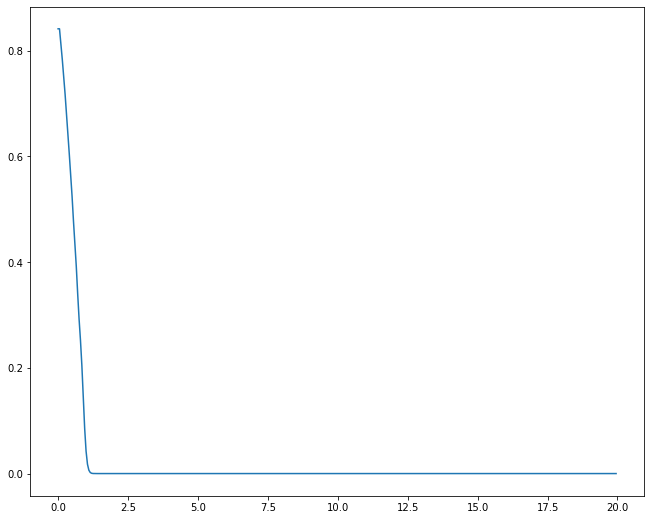

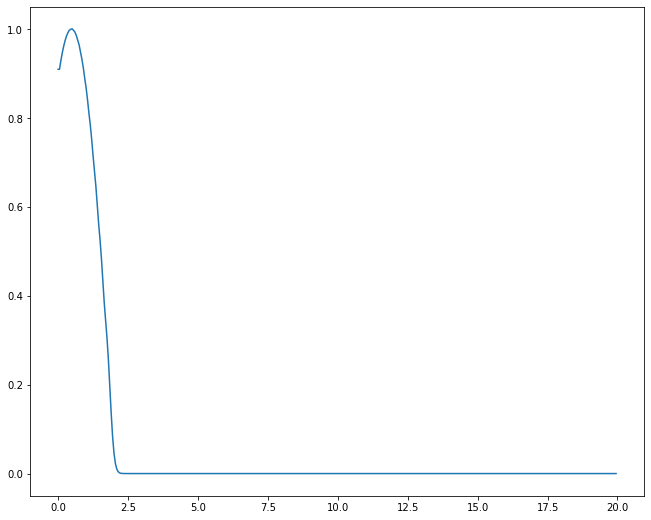

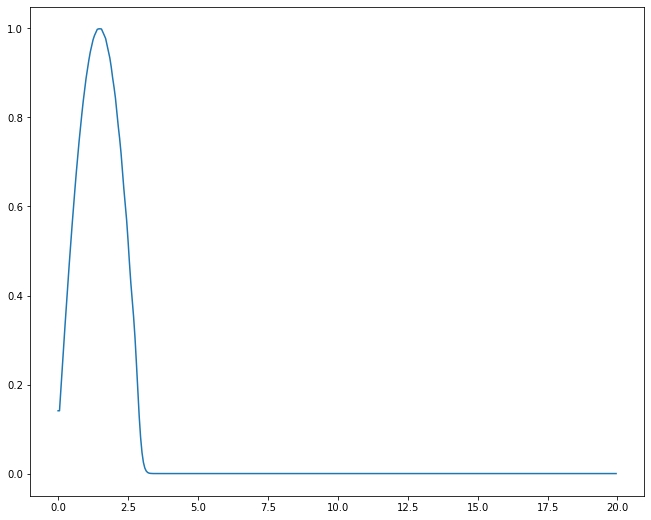

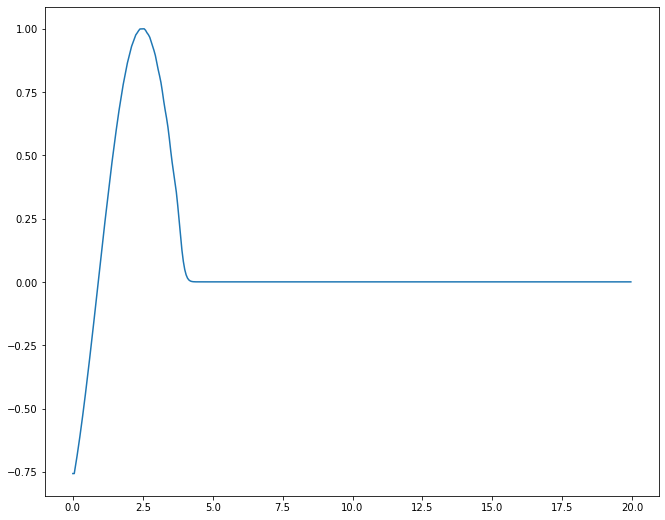

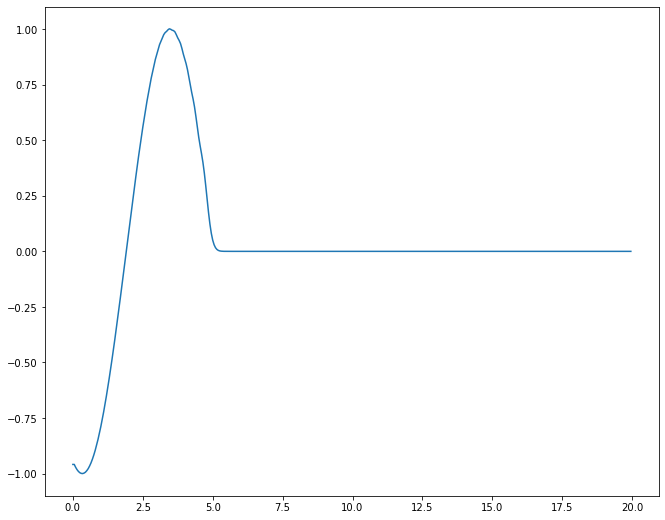

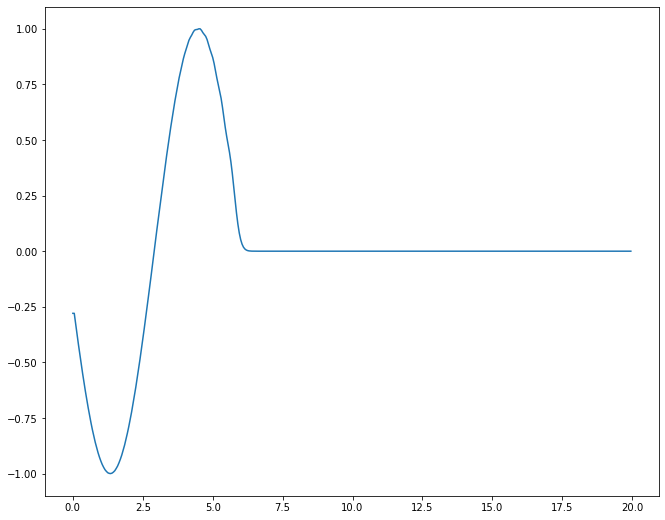

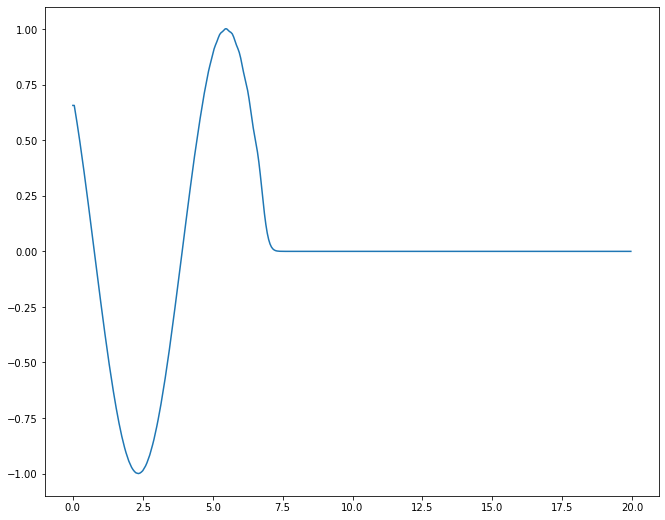

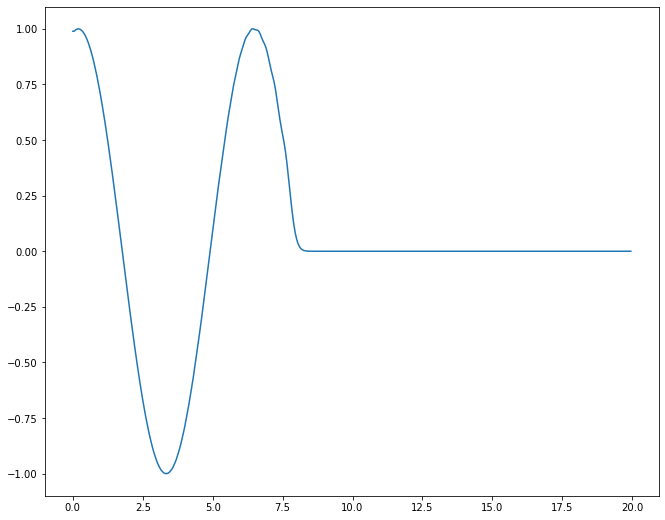

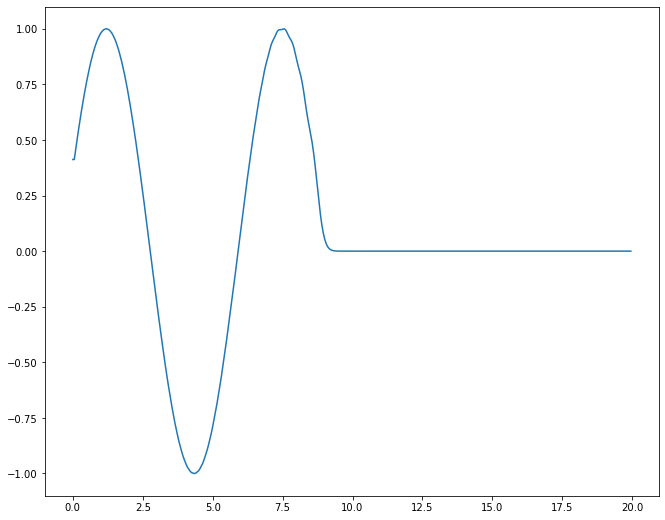

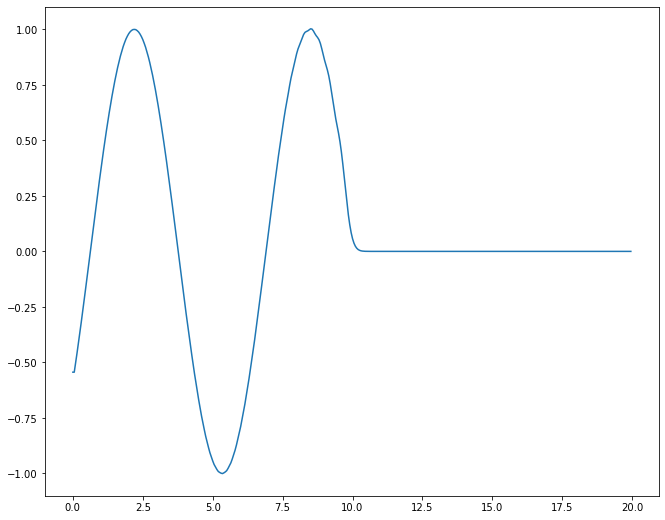

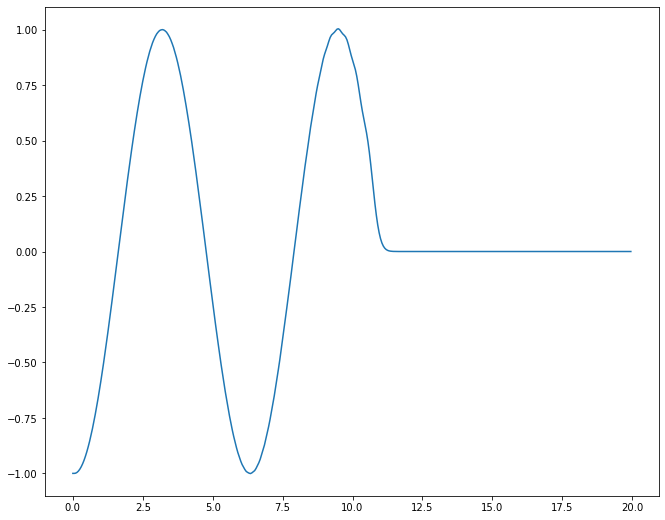

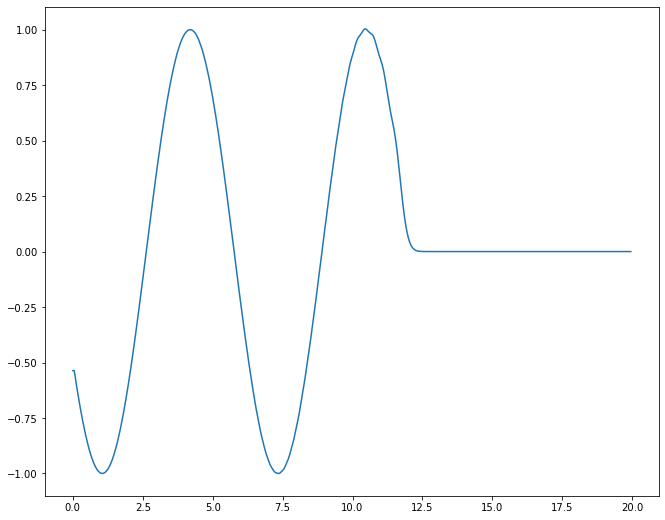

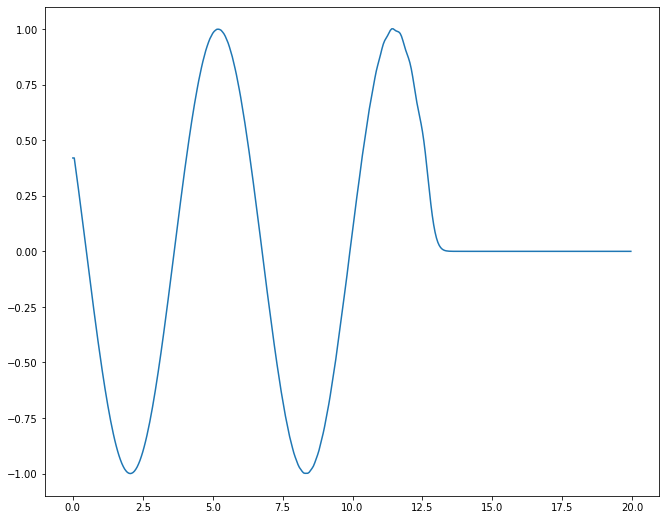

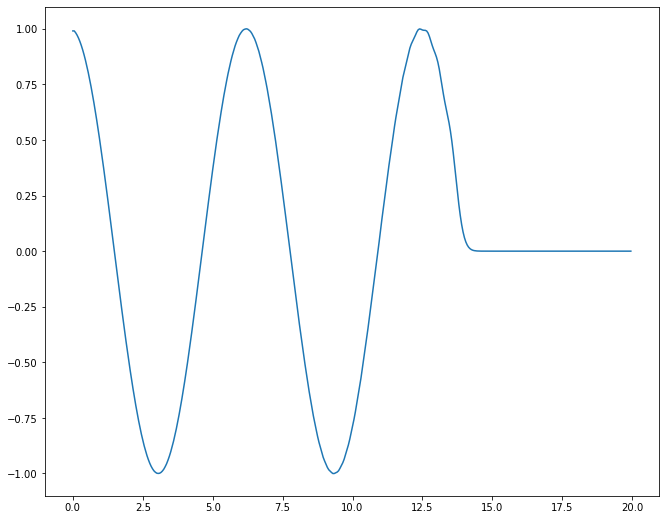

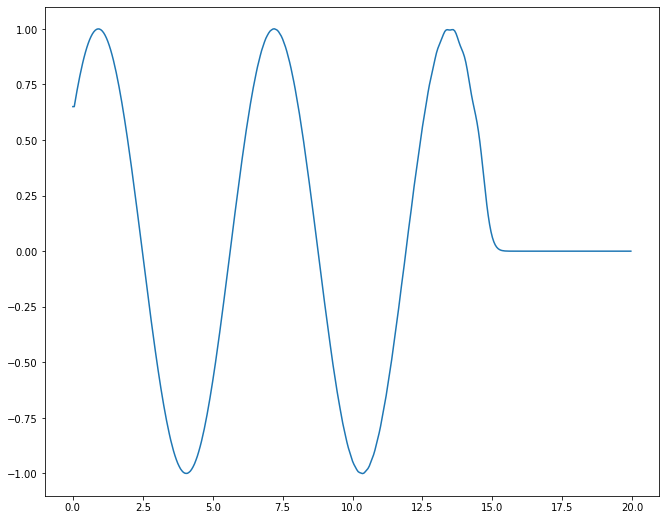

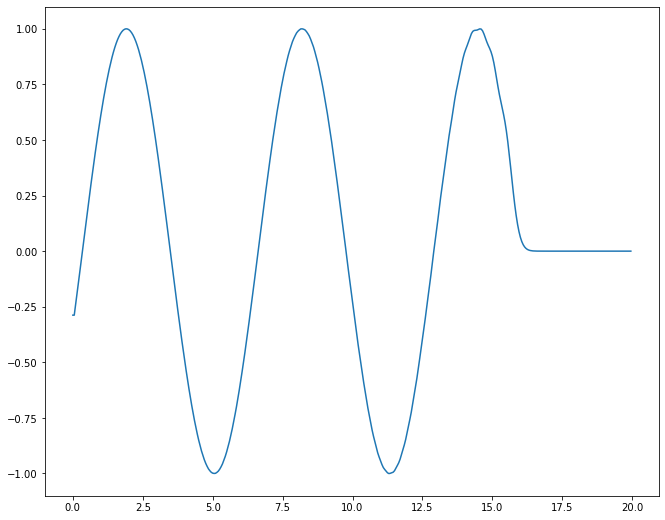

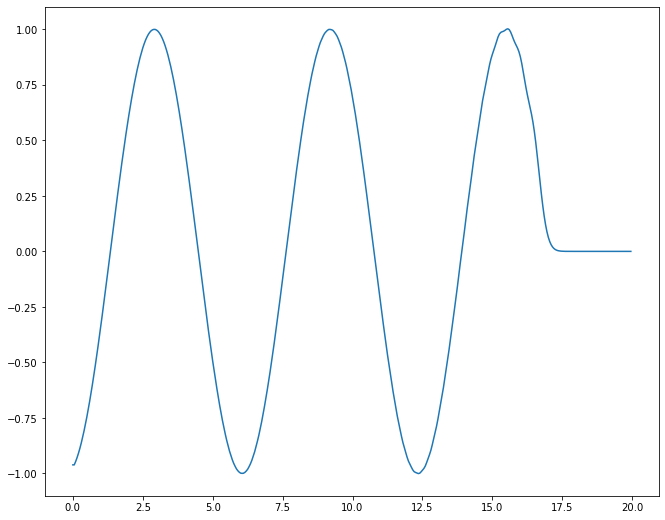

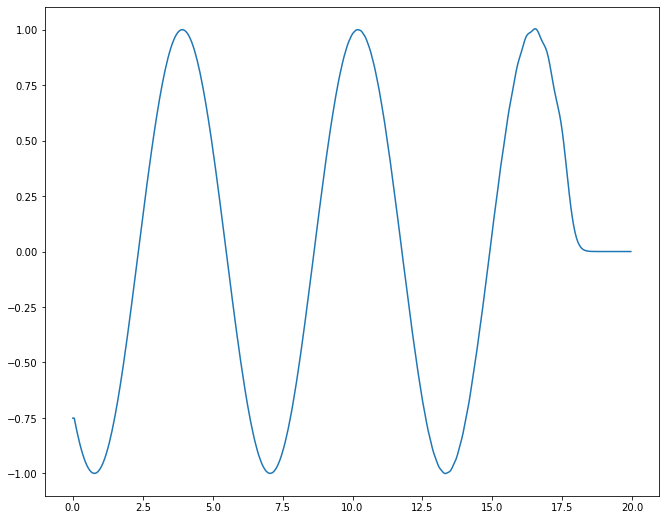

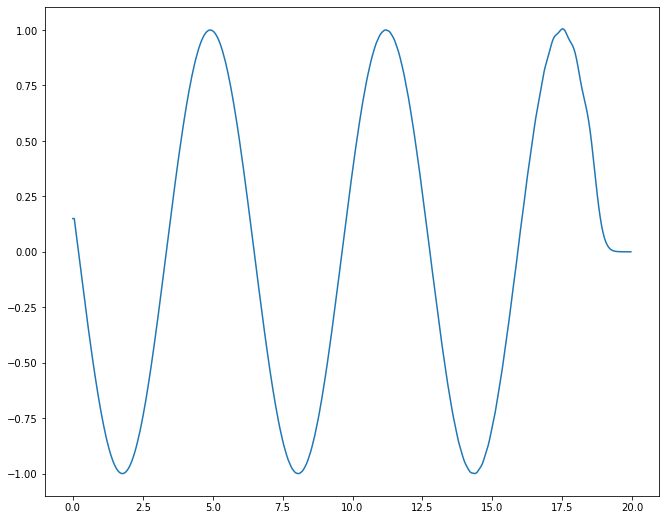

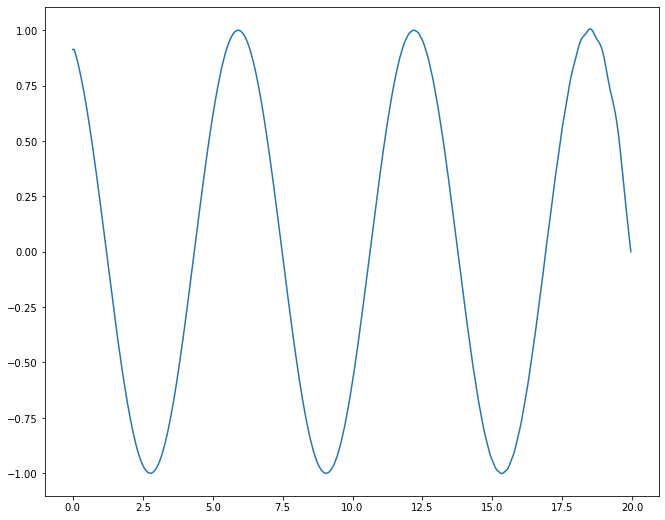

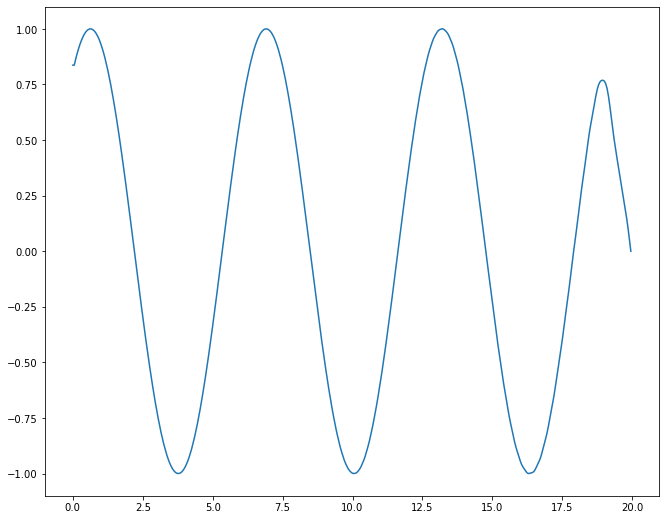

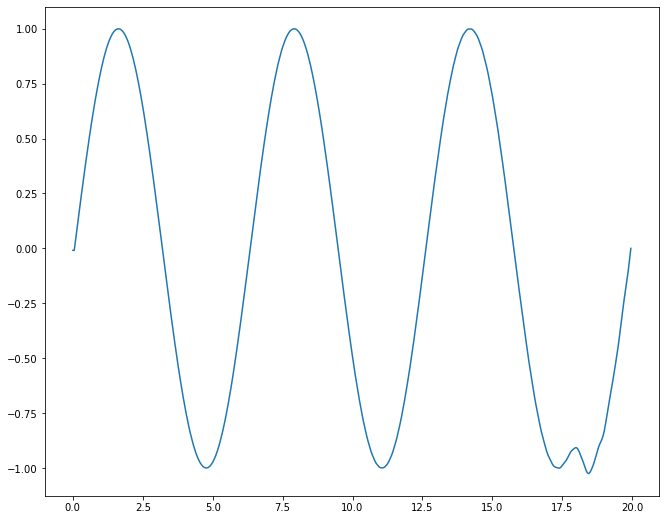

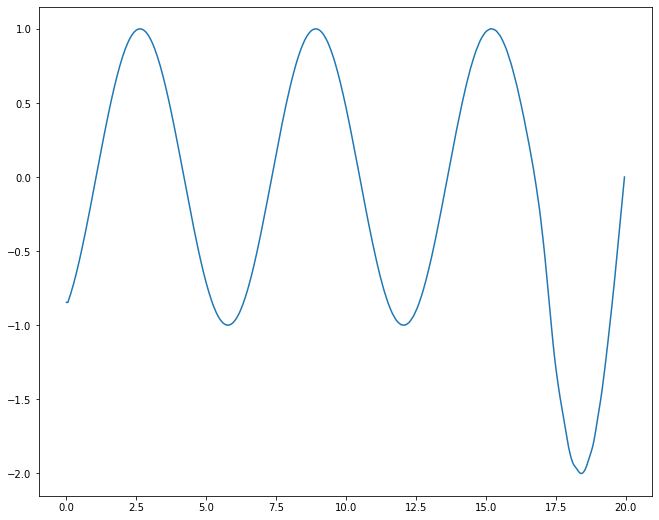

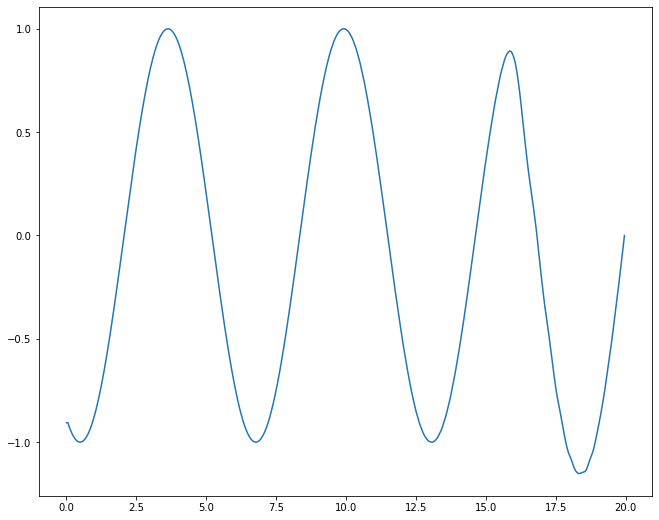

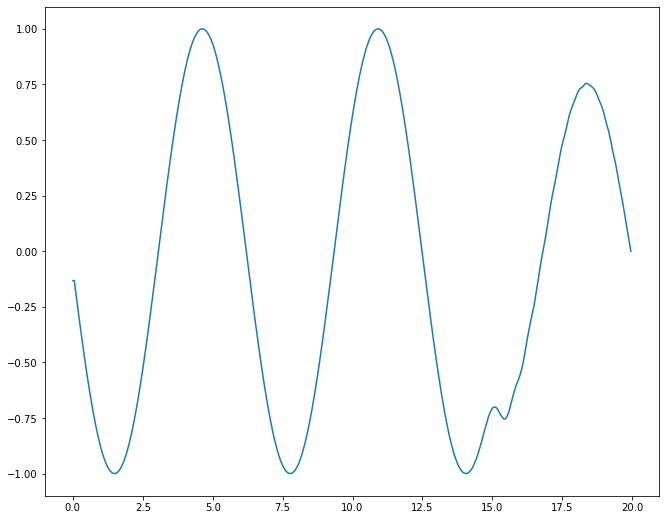

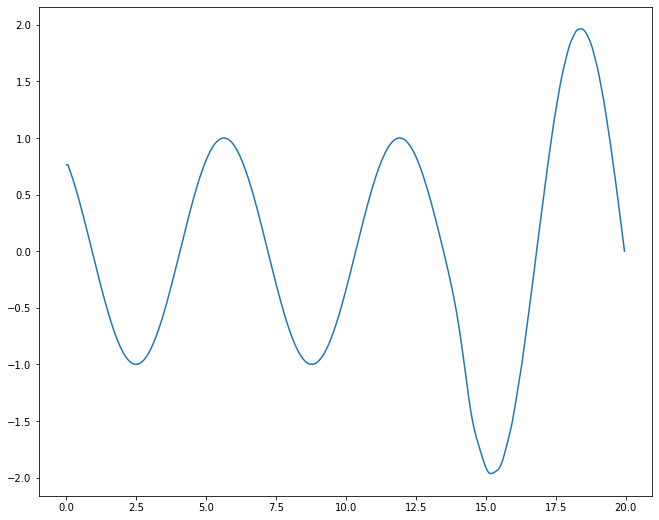

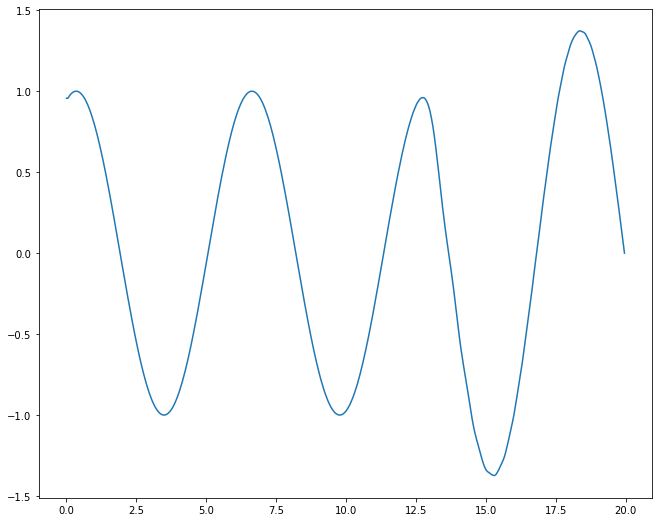

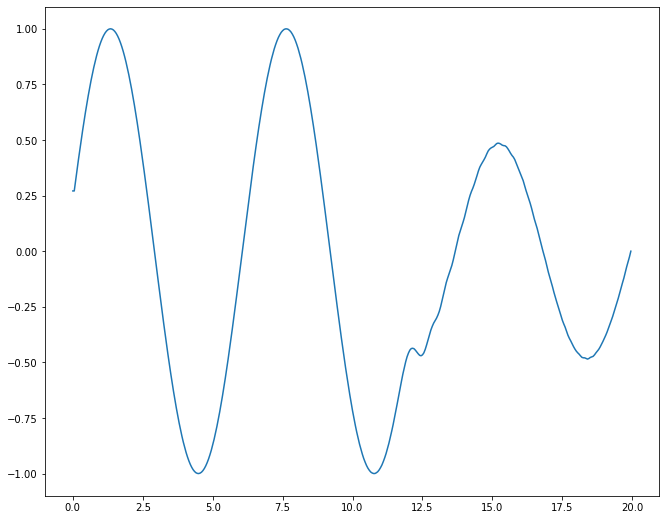

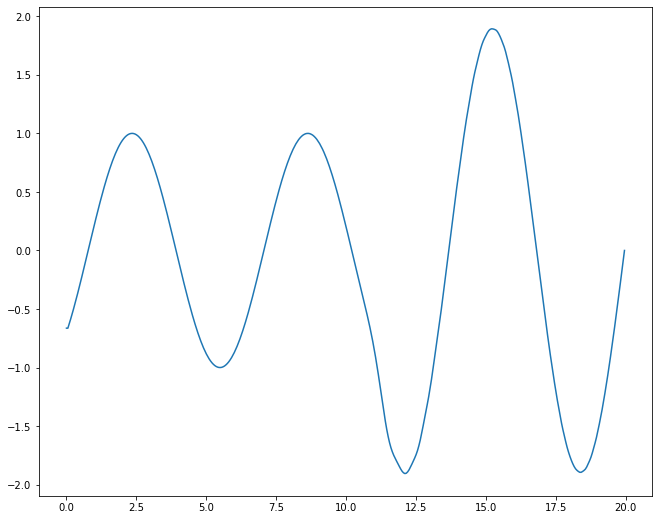

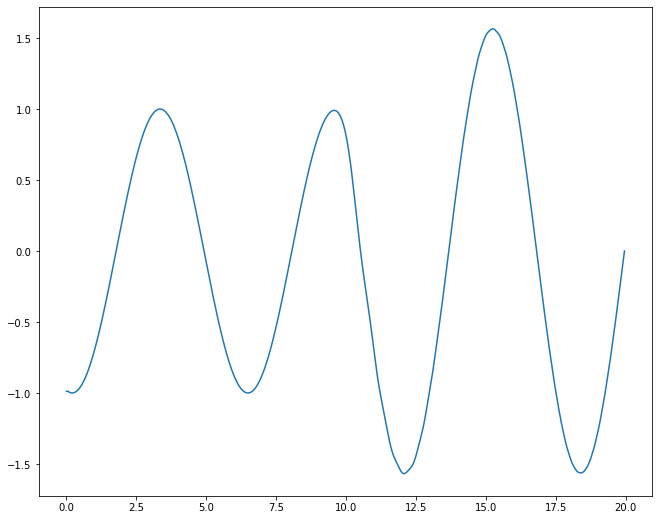

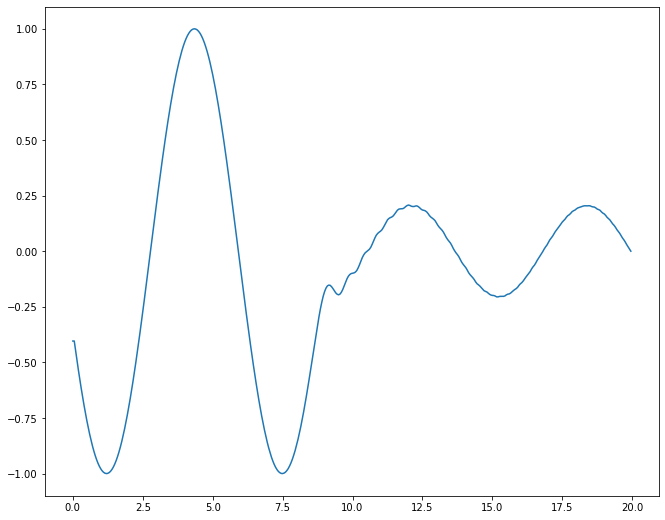

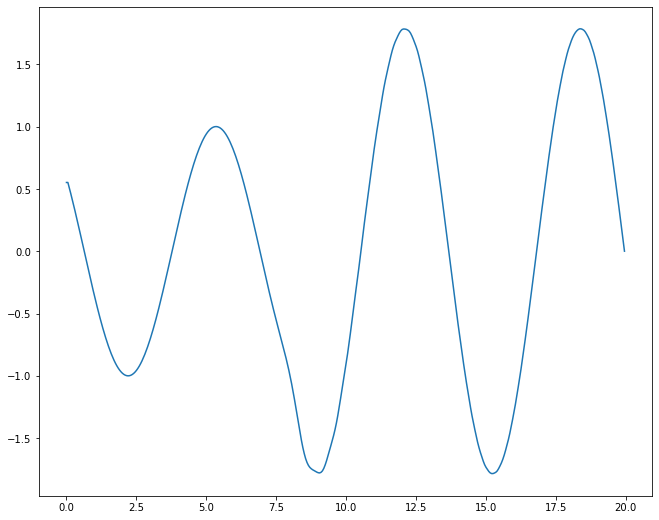

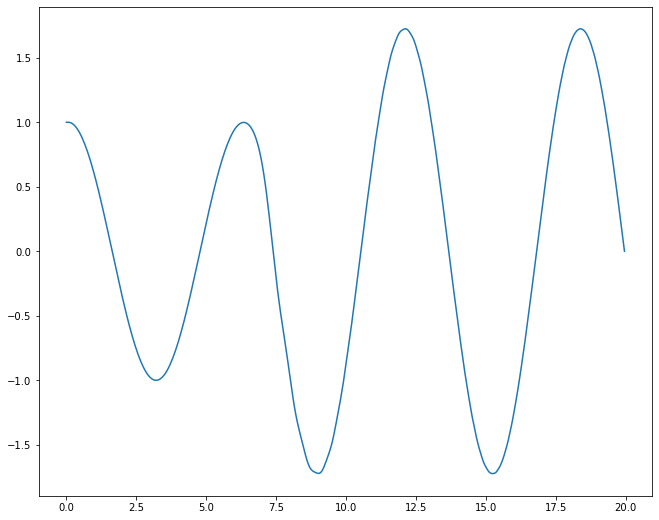

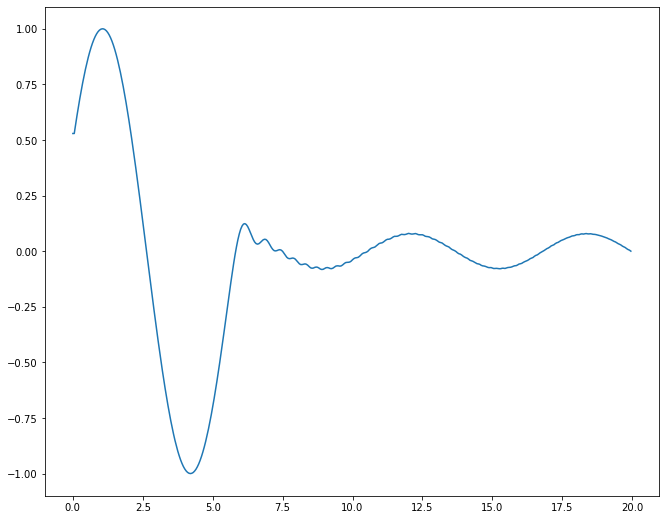

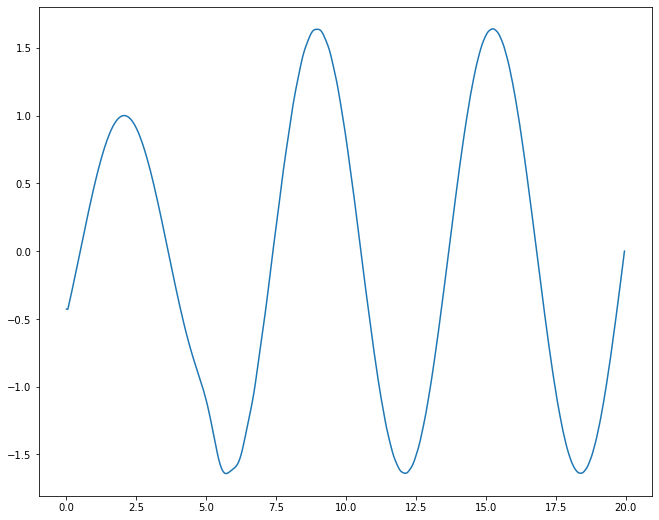

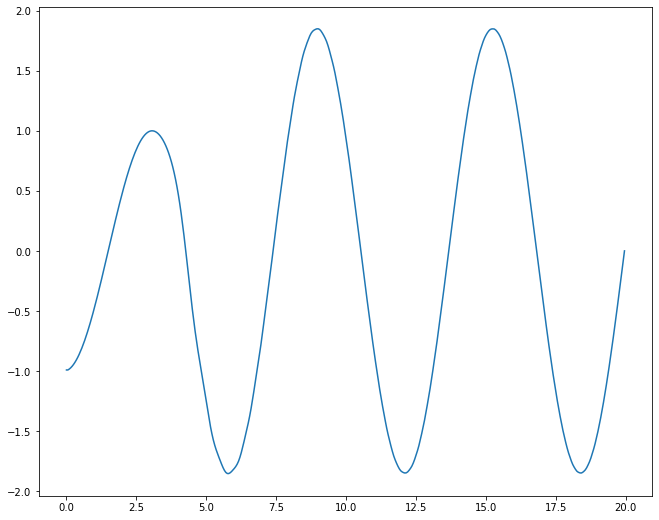

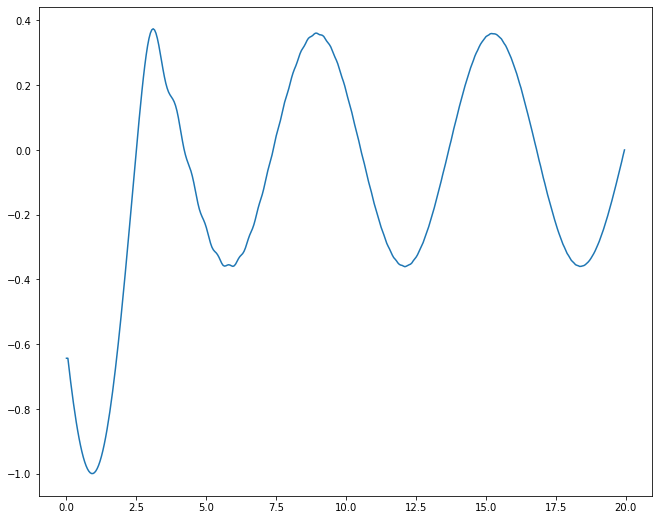

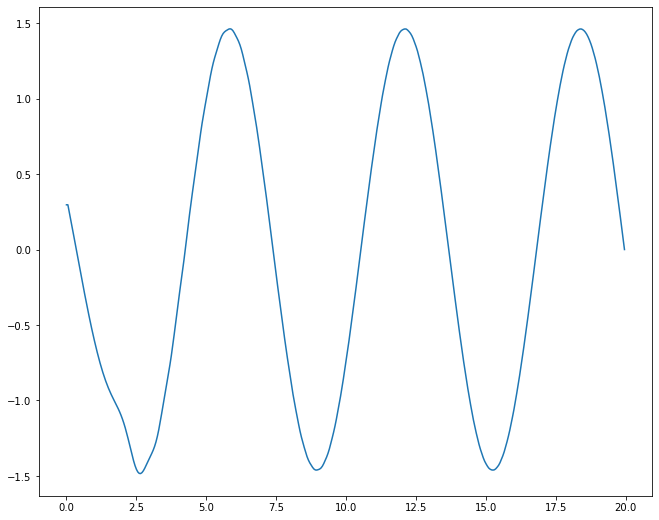

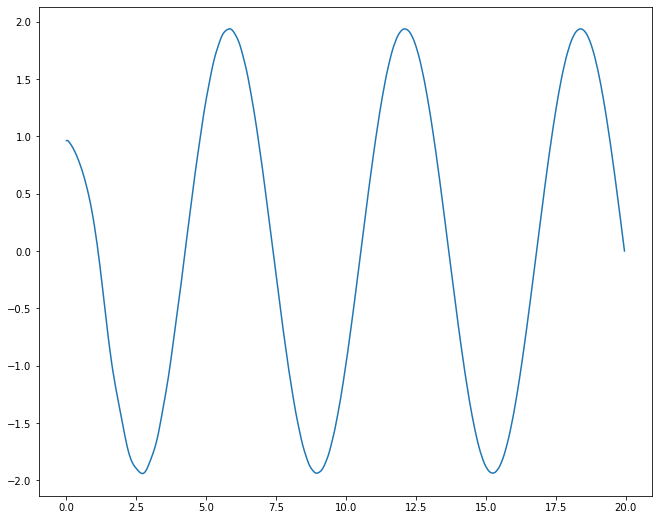

In [76]:
t = np.arange(0, 40, h_t) #copy and paste and change t
    
dispAll = np.zeros([t.size,x.size]) #creating the array to hold the u values

for i in range(1,t.size-1):
    dispAll[i, 0:2] = np.sin(t[i]) #setting boundary each time
    for j in range(2, x.size-1): #starting from 2 because the first 2 conditions are set
        dispAll[i+1,j] = ((h_t**2)/(h_x**2))*(dispAll[i,j+1] - 2*dispAll[i,j] + dispAll[i,j-1]) + 2*dispAll[i,j] - dispAll[i-1,j]
    if (i%100 == 0):   #this would be every 100th graph
        plt.plot(x, dispAll[i, :]) 
        plt.show()

It looks the exact same until the wave reaches the boundary and then starts coming back. When this happens there is constructive and destructive interference causing the wave to take all kinds of funky shapes

## Acknowledgements

Please comment on any help that you received from your group members or others concerning this Lab assignment.